# Malnutrition Worldwide: Etude de santé publique

L'étude suivante est effectuée dans le but d'avoir un panorama de l’état de la malnutrition dans le monde.

# Sommaire

* [1. Préparation du projet](#chapter1)
    * [1.1 Importation des librairies Python](#section_1_1)
    * [1.2 Importation des données](#section_1_2)
    * [1.3 Vérification des données](#section_1_3)
        * [1.3.1 Dataframe 'population'](#section_1_3_1)
        * [1.3.2 Dataframe 'aide'](#section_1_3_2)
        * [1.3.3 Dataframe 'dispo'](#section_1_3_3)
        * [1.3.4 Dataframe 'sous_nut'](#section_1_3_4)
        * [1.3.5 Valeurs manquantes](#section_1_3_5)
* [2. Analyse des données](#chapter2)
    * [2.1 Requêtes de Marc](#section_2_1)
        * [2.1.1 Proportion de personnes en état de sous-nutrition](#section_2_1_1)
        * [2.1.2 Nombre théorique de personnes qui pourraient être nourries](#section_2_1_2)
        * [2.1.3 Nombre théorique de personnes qui pourraient être nourries grâce aux produits végétaux](#section_2_1_3)
        * [2.1.4 Utilisation de la disponibilité intérieure](#section_2_1_4)
    * [2.2 Reqêtes de Mélanie](#section_2_2)
        * [2.2.1 Pays dont la proportion de personnes sous-alimentées la plus forte en 2017](#section_2_2_1)
        * [2.2.2 Pays qui ont le plus bénéficié d’aide depuis 2013](#section_2_2_2)
        * [2.2.3 Pays ayant le plus/le moins de disponibilité/habitant](#section_2_2_3)   
    * [2.3 Recherches de Julien](#section_2_3)
        * [2.3.1 Répartition de l'utilisation des céréales](#section_2_3_1)
        * [2.3.2 Situation de la Thaïlande](#section_2_3_2)
* [Bilan de l'étude](#bilan)

# 1. Préparation du projet <a class="anchor" id="#chapter1"></a>

## 1.1 Importation des librairies Python <a class="anchor" id="##section_1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## 1.2 Importation des données <a class="anchor" id="##section_1_2"></a>

Fichiers disponibles :


* Un fichier de disponibilité alimentaire qui contient 17 variables :
    - Le pays
    - Le produit
    - 4 variables de disponibilité alimentaire
    - 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire en milliers de tonnes.
    - 1 variable qui précise si le produit est d’origine animale ou végétale.


* Un fichier d’insécurité alimentaire qui inclut :
    - Le pays
    - Intervalle d’années
    - Le nombre de personnes en sous-alimentation en millions d’habitants 


* Un fichier de population qui inclut :
    - Le pays
    - L’année
    - La population du pays, exprimée en milliers d’habitants


* Un fichier d’aide alimentaire qui contient :
    - Le pays bénéficiaire
    - L’année
    - Le produit
    - La quantité qui a été donnée comme aide alimentaire, en tonnes

In [2]:
population = pd.read_csv('population.csv')
sous_nut = pd.read_csv('sous_nutrition.csv')
dispo = pd.read_csv('dispo_alimentaire.csv')
aide = pd.read_csv('aide_alimentaire.csv')

## 1.3 Vérification des données <a class="anchor" id="##section_1_3"></a>

### 1.3.1 Dataframe 'population' <a class="anchor" id="##section_1_3_1"></a>

In [3]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Nous vérifions les types de données du Dataframe "population".

In [4]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [5]:
population['Zone'] = population['Zone'].astype('string')
population.dtypes

Zone       string
Année       int64
Valeur    float64
dtype: object

Nous changeons le nom de la colonne 'Valeur' en 'Population'.

In [6]:
population = population.rename(columns = {'Valeur' : 'Population'})

### 1.3.2 Dataframe 'aide' <a class="anchor" id="##section_1_3_2"></a>

In [7]:
aide.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Nous renommons la variable 'Pays bénéficiaire' en 'Zone' et la variable 'Valeur' en 'Aide alimentaire'.

In [8]:
aide = aide.rename(columns={'Pays bénéficiaire' : 'Zone'})
aide = aide.rename(columns = {'Valeur' : 'Aide alimentaire'})


Nous vérifions les types de données du Dataframe "aide " et nous les transformons.

In [9]:
aide.dtypes

Zone                object
Année                int64
Produit             object
Aide alimentaire     int64
dtype: object

In [10]:
# Transformation des types de données
aide['Zone'] = aide['Zone'].astype('string')
aide['Produit'] = aide['Produit'].astype('string')
aide.dtypes

Zone                string
Année                int64
Produit             string
Aide alimentaire     int64
dtype: object

### 1.3.3 Dataframe 'dispo' <a class="anchor" id="##section_1_3_3"></a>

In [11]:
dispo.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Nous vérifions les types de données du Dataframe "dispo" et nous les transformons.

In [12]:
dispo.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [13]:
# Transformation des types
dispo['Zone'] = dispo['Zone'].astype('string')
dispo['Produit'] = dispo['Produit'].astype('string')
dispo['Origine'] = dispo['Origine'].astype('string')
dispo.dtypes

Zone                                                              string
Produit                                                           string
Origine                                                           string
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

### 1.3.4 Dataframe 'sous-nut' <a class="anchor" id="##section_1_3_4"></a>

In [14]:
sous_nut.head(7)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
5,Afghanistan,2017-2019,11.1
6,Afrique du Sud,2012-2014,2.2


Nous changeons les variables 'Année' pour homogénéiser le format avec les autres Dataframe.

In [15]:
sous_nut['Année'] = sous_nut['Année'].replace('2012-2014', '2013')
sous_nut['Année'] = sous_nut['Année'].replace('2013-2015', '2014')
sous_nut['Année'] = sous_nut['Année'].replace('2014-2016', '2015')
sous_nut['Année'] = sous_nut['Année'].replace('2015-2017', '2016')
sous_nut['Année'] = sous_nut['Année'].replace('2016-2018', '2017')
sous_nut['Année'] = sous_nut['Année'].replace('2017-2019', '2018')

Certaines valeurs de la population en sous-nutrition sont notées "<0.1". 
Nous décidons de les remplacer par "0".

In [16]:
sous_nut['Valeur'] = sous_nut['Valeur'].replace('<0.1', 0)

Nous vérifions les types de données du Dataframe "dispo" et nous les transformons.

In [17]:
sous_nut.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [18]:
# Transformation des types
sous_nut['Zone'] = sous_nut['Zone'].astype('string')
sous_nut['Année'] = sous_nut['Année'].astype(int)
sous_nut['Valeur'] = sous_nut['Valeur'].astype(float)
sous_nut.dtypes

Zone       string
Année       int32
Valeur    float64
dtype: object

Nous renommons la nom colonne 'Valeur' en 'Population en sous-nutrition'.

In [19]:
sous_nut = sous_nut.rename(columns = {'Valeur' : 'Population en sous-nutrition'})
sous_nut

,Zone,Année,Population en sous-nutrition
0,Afghanistan,2013,8.6
1,Afghanistan,2014,8.8
2,Afghanistan,2015,8.9
3,Afghanistan,2016,9.7
4,Afghanistan,2017,10.5
...,...,...,...
1213,Zimbabwe,2014,NaN
1214,Zimbabwe,2015,NaN
1215,Zimbabwe,2016,NaN
1216,Zimbabwe,2017,NaN


### 1.3.5 Valeurs manquantes <a class="anchor" id="##section_1_3_5"></a>

Nous vérifions les valeurs manquantes des 4 dataframes.

In [20]:
population.isnull().sum()

Zone          0
Année         0
Population    0
dtype: int64

In [21]:
aide.isnull().sum()

Zone                0
Année               0
Produit             0
Aide alimentaire    0
dtype: int64

In [22]:
sous_nut.isnull().sum()

Zone                              0
Année                             0
Population en sous-nutrition    594
dtype: int64

In [23]:
dispo.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

Nous ne disposons pas de certaines données dans les dataframes "sous_nut" et "aide".

Nous choisissons de continuer l'étude en faisant abstraction de ces valeurs manquantes.

# 2. Analyses <a class="anchor" id="##chapter2"></a>

## 2.1 Requêtes de Marc <a class="anchor" id="##section_2_1"></a>

Nous nous intéresserons aux données de l'année 2017. 

### 2.1.1 Proportion de personnes en état de sous-nutrition <a class="anchor" id="##section_2_1_1"></a>

Dans un premier temps, nous allons calculer la proportion de personnes en état de sous-nutrition.

Pour cela, je convertis tout d'abord les valeurs de 'Population en sous-nutrition' exprimée en millions d'habitants et 'population' qui est exprimée en milliers d'habitants . Ces deux valeurs seront exprimées en nombre d'habitants.

In [24]:
sous_nut['Population en sous-nutrition'] = sous_nut['Population en sous-nutrition']*1000000
population['Population'] = population['Population']*1000

Nous filtrons ensuite les dataframes "sous_nut" et "population" pour ne conserver que les valeurs de l'année 2017.

In [25]:
# Dataframe sous_nut_2017
sous_nut_2017 = sous_nut[sous_nut['Année']==2017]
sous_nut_2017

,Zone,Année,Population en sous-nutrition
4,Afghanistan,2017,10500000.0
10,Afrique du Sud,2017,3100000.0
16,Albanie,2017,100000.0
22,Algérie,2017,1300000.0
28,Allemagne,2017,NaN
...,...,...,...
1192,Venezuela (République bolivarienne du),2017,8000000.0
1198,Viet Nam,2017,6500000.0
1204,Yémen,2017,NaN
1210,Zambie,2017,NaN


In [26]:
# Dataframe population_2017
population_2017 = population[population['Année']==2017]
population_2017

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


Nous effectuons ensuite une jointure des dataframes 'population_2017' et 'sous_nut_2017'.

In [27]:
proportion_sous_nut_2017 = pd.merge(population_2017, sous_nut_2017)
proportion_sous_nut_2017

,Zone,Année,Population,Population en sous-nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,NaN
...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,8000000.0
199,Viet Nam,2017,94600648.0,6500000.0
200,Yémen,2017,27834819.0,NaN
201,Zambie,2017,16853599.0,NaN


Nous pouvons maintenant calculer la proportion mondiale de personnes en état de sous-nutrition en 2017.

In [28]:
proportion_mondiale_sous_nut_2017 = (proportion_sous_nut_2017['Population en sous-nutrition'].sum() 
                                     / proportion_sous_nut_2017['Population'].sum())*100
proportion_sous_nut_2017_total_millions = (proportion_sous_nut_2017['Population en sous-nutrition'].sum())/1000000
print("En 2017,", proportion_sous_nut_2017_total_millions, " millions de personnes souffraient de sous-nutrition soit", round(proportion_mondiale_sous_nut_2017,2) , "% de la population mondiale.") 

En 2017, 535.7  millions de personnes souffraient de sous-nutrition soit 7.1 % de la population mondiale.


### 2.1.2 Nombre théorique de personnes qui pourraient être nourries <a class="anchor" id="##section_2_1_2"></a>

Intéressons nous maintenant au nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale.


Nous créons un nouveau dataframe 'dispo_par_zone' dans lequel nous regroupons la Disponibilité alimentaire par pays.

In [29]:
dispo_par_zone=dispo.groupby(by=['Zone'], as_index=False)[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
dispo_par_zone

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2087.0
1,Afrique du Sud,3020.0
2,Albanie,3188.0
3,Algérie,3293.0
4,Allemagne,3503.0
...,...,...
169,Émirats arabes unis,3275.0
170,Équateur,2346.0
171,États-Unis d'Amérique,3682.0
172,Éthiopie,2129.0


Nous effectuons une jointure des dataframes "population_2017" et "dispo_par_zone"

In [30]:
dispo_2017 = pd.merge(population_2017, dispo_par_zone, on='Zone')
dispo_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,2087.0
1,Afrique du Sud,2017,57009756.0,3020.0
2,Albanie,2017,2884169.0,3188.0
3,Algérie,2017,41389189.0,3293.0
4,Allemagne,2017,82658409.0,3503.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2633.0
168,Viet Nam,2017,94600648.0,2744.0
169,Yémen,2017,27834819.0,2217.0
170,Zambie,2017,16853599.0,1924.0


Nous pouvons ainsi calculer la disponibilité alimentaire totale kcal/jour par pays.

In [31]:
dispo_2017['Disponibilité alimentaire (Kcal/jour)'] = (dispo_2017['Disponibilité alimentaire (Kcal/personne/jour)'])*(dispo_2017['Population'])
dispo_2017

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire (Kcal/jour)
0,Afghanistan,2017,36296113.0,2087.0,7.574999e+10
1,Afrique du Sud,2017,57009756.0,3020.0,1.721695e+11
2,Albanie,2017,2884169.0,3188.0,9.194731e+09
3,Algérie,2017,41389189.0,3293.0,1.362946e+11
4,Allemagne,2017,82658409.0,3503.0,2.895524e+11
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2633.0,7.741674e+10
168,Viet Nam,2017,94600648.0,2744.0,2.595842e+11
169,Yémen,2017,27834819.0,2217.0,6.170979e+10
170,Zambie,2017,16853599.0,1924.0,3.242632e+10


Nous faisons l'hypothèse que le besoin énergétique moyen d'une personne est de 2200 kcal/jour.

In [32]:
Besoin_journalier_kcal_j = 2200

Nous calculons le nombre théorique de personnes qui pourraient être nourries dans le monde si toute la disponibilité intérieure mondiale était utilisée pour de la nourriture .

In [33]:
nombre_théorique_personnes_nourries = (dispo_2017['Disponibilité alimentaire (Kcal/jour)'].sum() / Besoin_journalier_kcal_j)
nombre_théorique_personnes_nourries_milliards = nombre_théorique_personnes_nourries / 1000000000
population_mondiale_2017 = dispo_2017['Population'].sum()
population_mondiale_2017_milliards = population_mondiale_2017 / 1000000000

print("En 2017, en théorie", round(nombre_théorique_personnes_nourries_milliards,2),'milliards de personnes pourraient être nourries dans le monde, soit',round(nombre_théorique_personnes_nourries/population_mondiale_2017*100),'% de la population mondiale.') 

En 2017, en théorie 9.51 milliards de personnes pourraient être nourries dans le monde, soit 130 % de la population mondiale.


###  2.1.3 Nombre théorique de personnes qui pourraient être nourries grâce aux produits végétaux <a class="anchor" id="##section_2_1_2"></a>

Nous souhaitons calculer le nombre théorique de personnes qui pourraient être nourries dans le monde si toute la disponibilité intérieure mondiale végétale était utilisée pour de la nourriture .

Filtrons tout d'abord le dataframe 'dispo' pour ne sélectionner que les aliments d'origine végétale.

In [34]:
dispo_végétale = dispo[dispo['Origine'] == 'vegetale']
dispo_végétale

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,NaN,NaN,0.0,0.01,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15596,Îles Salomon,Thé,vegetale,NaN,NaN,0.0,0.17,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15597,Îles Salomon,Tomates,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Nous créons un nouveau dataframe 'dispo_végétale_par_zone' dans lequel nous regroupons la Disponibilité alimentaire végétale par pays.

In [35]:
dispo_végétale_par_zone=dispo_végétale.groupby(by=['Zone'])[['Disponibilité alimentaire (Kcal/personne/jour)']].sum()
dispo_végétale_par_zone = dispo_végétale_par_zone.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)' : 'Disponibilité alimentaire végétale (Kcal/personne/jour)'})
dispo_végétale_par_zone

,Disponibilité alimentaire végétale (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


Nous effectuons une jointure des dataframes "population_2017" et "dispo_vegetale_par_zone".

In [36]:
dispo_végétale_2017 = pd.merge(population_2017, dispo_végétale_par_zone, on='Zone')
dispo_végétale_2017

,Zone,Année,Population,Disponibilité alimentaire végétale (Kcal/personne/jour)
0,Afghanistan,2017,36296113.0,1871.0
1,Afrique du Sud,2017,57009756.0,2533.0
2,Albanie,2017,2884169.0,2203.0
3,Algérie,2017,41389189.0,2915.0
4,Allemagne,2017,82658409.0,2461.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2157.0
168,Viet Nam,2017,94600648.0,2169.0
169,Yémen,2017,27834819.0,2028.0
170,Zambie,2017,16853599.0,1818.0


Nous pouvons ainsi calculer la disponibilité alimentaire végétale totale kcal/jour par pays.

In [37]:
dispo_végétale_2017['Disponibilité alimentaire végétale (Kcal/jour)'] = (dispo_végétale_2017['Disponibilité alimentaire végétale (Kcal/personne/jour)'])*(dispo_végétale_2017['Population'])
dispo_végétale_2017

,Zone,Année,Population,Disponibilité alimentaire végétale (Kcal/personne/jour),Disponibilité alimentaire végétale (Kcal/jour)
0,Afghanistan,2017,36296113.0,1871.0,6.791003e+10
1,Afrique du Sud,2017,57009756.0,2533.0,1.444057e+11
2,Albanie,2017,2884169.0,2203.0,6.353824e+09
3,Algérie,2017,41389189.0,2915.0,1.206495e+11
4,Allemagne,2017,82658409.0,2461.0,2.034223e+11
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402484.0,2157.0,6.342116e+10
168,Viet Nam,2017,94600648.0,2169.0,2.051888e+11
169,Yémen,2017,27834819.0,2028.0,5.644901e+10
170,Zambie,2017,16853599.0,1818.0,3.063984e+10


Nous calculons enfin le nombre théorique de personnes qui pourraient être nourries dans le monde si toute la disponibilité intérieure mondiale végétale était utilisée pour de la nourriture .

In [38]:
nombre_théorique_personnes_nourries_végétale = (dispo_végétale_2017['Disponibilité alimentaire végétale (Kcal/jour)'].sum() / Besoin_journalier_kcal_j)
nombre_théorique_personnes_nourries_végétale_milliards = nombre_théorique_personnes_nourries_végétale / 1000000000

print("En 2017, en théorie", round(nombre_théorique_personnes_nourries_végétale_milliards,2),'milliards de personnes pourraient être nourries dans le monde grâce aux produits végétaux, soit',round(nombre_théorique_personnes_nourries_végétale/population_mondiale_2017*100),'% de la population mondiale.') 

En 2017, en théorie 7.85 milliards de personnes pourraient être nourries dans le monde grâce aux produits végétaux, soit 108 % de la population mondiale.


Visualisons maintenant ces données calculées.

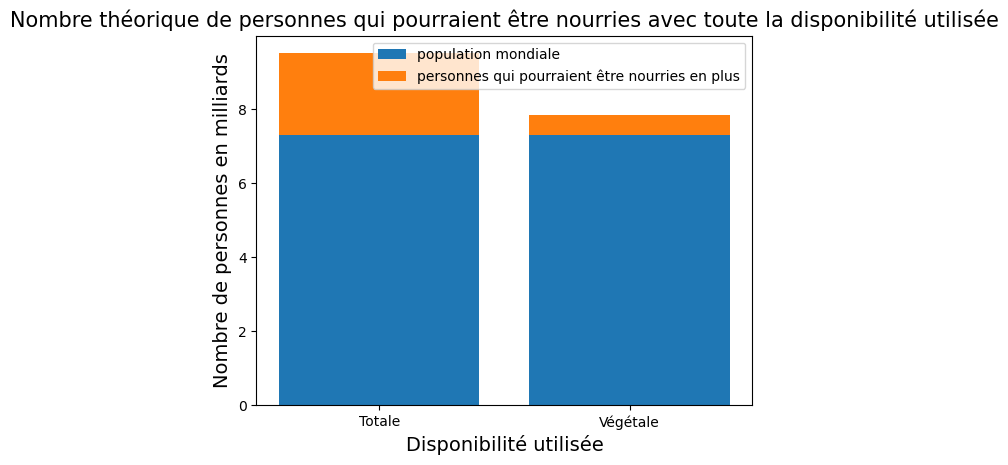

In [39]:
nourries = ["Totale", "Végétale"]
nombre1 = [(nombre_théorique_personnes_nourries_milliards-population_mondiale_2017_milliards), (nombre_théorique_personnes_nourries_végétale_milliards-population_mondiale_2017_milliards)]
nombre2 = [population_mondiale_2017_milliards,population_mondiale_2017_milliards]

legend = ['population mondiale','personnes qui pourraient être nourries en plus']
pos = np.arange(len(nourries))

plt.bar(nourries, nombre2)
plt.bar(nourries, nombre1, bottom = nombre2)
plt.legend(legend,loc=1) 
plt.xticks(pos,nourries)
plt.ylabel('Nombre de personnes en milliards', fontsize=14)
plt.xlabel('Disponibilité utilisée', fontsize=14)
plt.title('Nombre théorique de personnes qui pourraient être nourries avec toute la disponibilité utilisée',fontsize=15)
plt.show()


### 2.1.4 Utilisation de la disponibilité intérieure <a class="anchor" id="##section_2_1_4"></a>

Il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
les utilisations de la disponibilité intérieure, qui peut s’exprimer selon les deux équations suivantes:

Disponibilité intérieure = Nourriture + semences + pertes + aliments pour animaux + traitement + autres utilisations

Disponibilité intérieure = Production + Importation - Exportation + Variation des stocks

In [40]:
dispo

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


Nous allons visualiser la répartition des utilisations de la disponibilité mondiale en 2017 à l'aide d'un diagramme circulaire.

In [41]:
dispo_animale = dispo['Aliments pour animaux'].sum()
dispo_pertes = dispo['Pertes'].sum()
dispo_nourriture = dispo['Nourriture'].sum()
dispo_Autres_utilisations = dispo['Autres Utilisations'].sum()
dispo_Semences = dispo['Semences'].sum()
dispo_Traitement = dispo['Traitement'].sum()

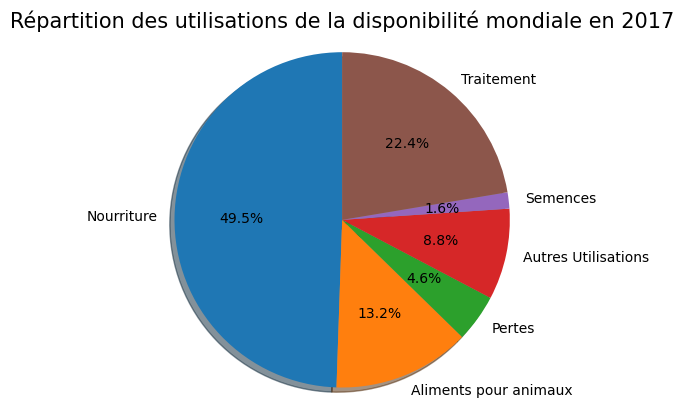

In [42]:
name = ['Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres Utilisations','Semences','Traitement']
data = [dispo_nourriture, dispo_animale, dispo_pertes, dispo_Autres_utilisations, dispo_Semences,dispo_Traitement]

explode=(0, 0, 0, 0,0,0)
plt.pie(data,explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Répartition des utilisations de la disponibilité mondiale en 2017',fontsize=15)
plt.show()

## 2.2 Requêtes de Mélanie <a class="anchor" id="##section_2_2"></a>

Nous allons effectuer une étude un peu plus fine pour chacun des pays.

### 2.2.1 Pays dont la proportion de personnes sous-alimentées la plus forte en 2017 <a class="anchor" id="##section_2_2_1"></a>

Nous cherchons à connaître les 20 pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017.

Pour cela, nous allons calculer la proportion de personnes en état de sous-nutrition par pays et les classer par ordre décroissant.


In [43]:
proportion_sous_nut_2017['proportion en sous-nutrition %'] =round(((proportion_sous_nut_2017['Population en sous-nutrition']
                                                            / proportion_sous_nut_2017['Population'])
                                                            * 100),2)

resultat = proportion_sous_nut_2017.sort_values(by = 'proportion en sous-nutrition %', ascending = False).head(20)
resultat

,Zone,Année,Population,Population en sous-nutrition,proportion en sous-nutrition %
78,Haïti,2017,10982366.0,5300000.0,48.26
157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
108,Madagascar,2017,25570512.0,10500000.0,41.06
103,Libéria,2017,4702226.0,1800000.0,38.28
100,Lesotho,2017,2091534.0,800000.0,38.25
183,Tchad,2017,15016753.0,5700000.0,37.96
161,Rwanda,2017,11980961.0,4200000.0,35.06
121,Mozambique,2017,28649018.0,9400000.0,32.81
186,Timor-Leste,2017,1243258.0,400000.0,32.17
0,Afghanistan,2017,36296113.0,10500000.0,28.93


Nous observons que plus de la moitié des pays, 13 au total, est issu du continent africain.

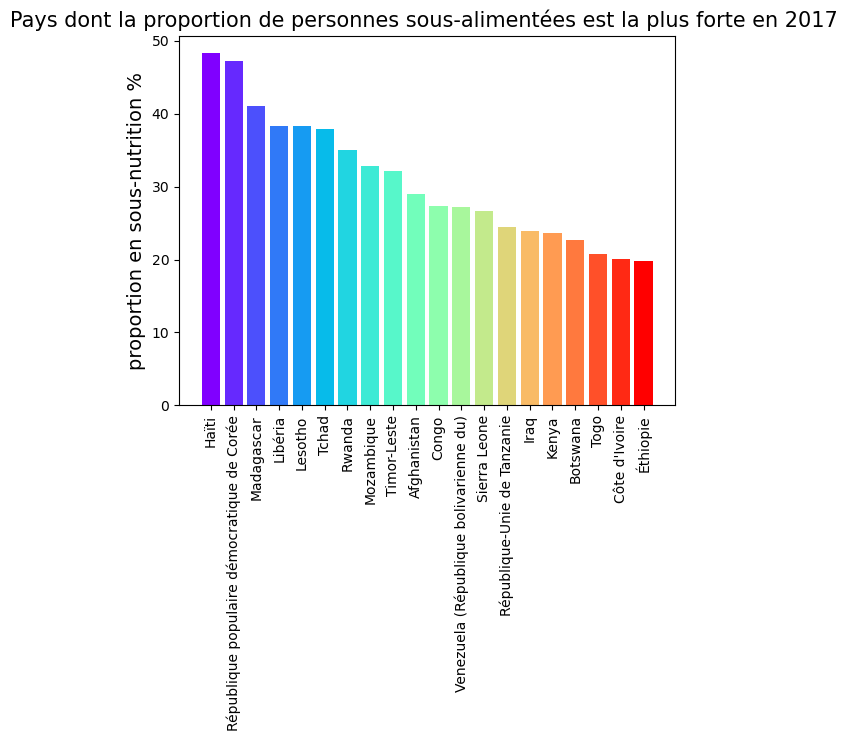

In [44]:
plt.bar(resultat['Zone'], resultat['proportion en sous-nutrition %'],color = cm.rainbow(np.linspace(0, 1, len(resultat))))
plt.ylabel('proportion en sous-nutrition %', fontsize=14)
plt.xticks(rotation = '90')
plt.title('Pays dont la proportion de personnes sous-alimentées est la plus forte en 2017 ',fontsize=15)
plt.show()

### 2.2.2 Pays qui ont le plus bénéficié d’aide depuis 2013 <a class="anchor" id="##section_2_2_2"></a>

Nous allons classer les 20 pays qui ont le plus bénéficiés d’aide depuis 2013. L'aide est exprimée en tonnes.

In [45]:
aide_2013 = aide.groupby(by=['Zone'], as_index=False)['Aide alimentaire'].sum()
aide_2013_head = aide_2013.sort_values(by ='Aide alimentaire', ascending=False).head(20)
aide_2013_head

,Zone,Aide alimentaire
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


Nous retrouvons dans ce classement principalement des pays asiatiques et africains.

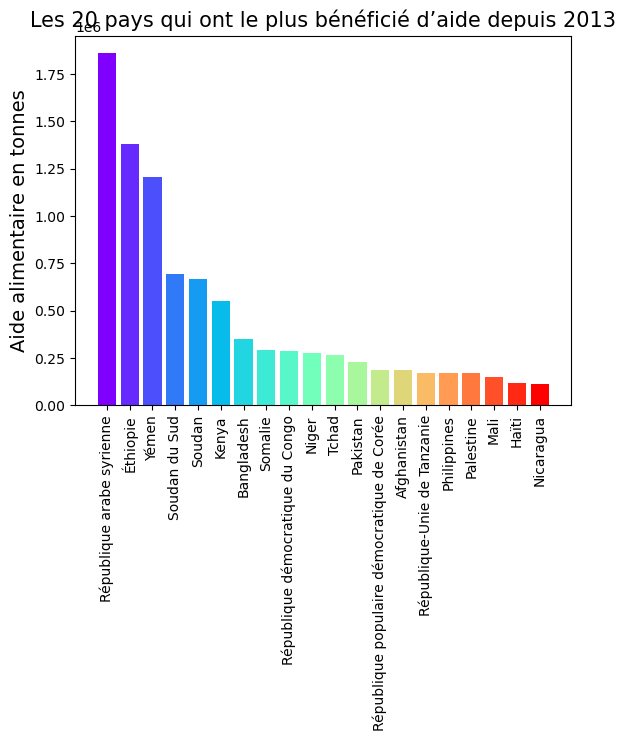

In [46]:
plt.bar(height=aide_2013_head['Aide alimentaire'], x=aide_2013_head['Zone'],color = cm.rainbow(np.linspace(0, 1, len(aide_2013_head))))
plt.xticks(rotation = '90')
plt.ylabel('Aide alimentaire en tonnes', fontsize=14)
plt.title('Les 20 pays qui ont le plus bénéficié d’aide depuis 2013',fontsize=15)
plt.show()


### 2.2.3 Pays ayant le plus/le moins de disponibilité/habitant <a class="anchor" id="##section_2_2_3"></a>

Intéressons nous à présent aux pays ayant le plus et aux pays ayant le moins de disponibilité/habitant/j.

In [47]:
print("Liste des pays qui disposaient du plus de disponibilité alimentaire ")
dispo_zone_head = dispo_par_zone.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(20)
dispo_zone_head

Liste des pays qui disposaient du plus de disponibilité alimentaire 


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,3770.0
16,Belgique,3737.0
159,Turquie,3708.0
171,États-Unis d'Amérique,3682.0
74,Israël,3610.0
72,Irlande,3602.0
75,Italie,3578.0
89,Luxembourg,3540.0
168,Égypte,3518.0
4,Allemagne,3503.0


Les pays qui ont le plus de disponibilité alimentaire sont en majorité européens et nord-américains.

In [48]:
print("Liste des pays qui disposaient du moins de disponibilité alimentaire ")
dispo_zone_head2 = dispo_par_zone.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(20)
dispo_zone_head2

Liste des pays qui disposaient du moins de disponibilité alimentaire 


,Zone,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,1879.0
166,Zambie,1924.0
91,Madagascar,2056.0
0,Afghanistan,2087.0
65,Haïti,2089.0
133,République populaire démocratique de Corée,2093.0
151,Tchad,2109.0
167,Zimbabwe,2113.0
114,Ouganda,2126.0
154,Timor-Leste,2129.0


On remarque qu'il y a un rapport de 2 entre le pays qui a le plus de disponibilité alimentaire, l'Autriche avec 3770 Kcal/personne/jour, et le pays qui en a le moins, République centrafricaine avec 1879 Kcal/personne/jour.

On retrouve encore une fois dans ce classement une majeure partie de pays africains et aussi asiatiques.

L'Afrique semble être le continent le plus en difficulté au niveau alimentaire.

## 2.3 Recherches de Julien <a class="anchor" id="##section_2_3"></a>

### 2.3.1 Répartition de l'utilisation des céréales <a class="anchor" id="##section_2_3_1"></a>

Intéressons nous à la répartition des céréales entre l’alimentation humaine (Nourriture) et l’alimentation pour animaux.

Nous allons faire la liste des produits céréales pour ensuite filtrer le df 'dispo' pour n'avoir que des produits céréales.


In [49]:
dispo['Produit'].unique()

<StringArray>
[        'Abats Comestible',          'Agrumes, Autres',
    'Aliments pour enfants',                   'Ananas',
                  'Bananes',             'Beurre, Ghee',
                    'Bière',                      'Blé',
     'Boissons Alcooliques',                     'Café',
       'Coco (Incl Coprah)',                    'Crème',
         'Céréales, Autres',                   'Dattes',
       'Edulcorants Autres',            'Feve de Cacao',
           'Fruits, Autres',         'Graines de coton',
     'Graines de tournesol',   'Graisses Animales Crue',
  'Huil Plantes Oleif Autr',   'Huile Graines de Coton',
         "Huile d'Arachide",            "Huile d'Olive",
  'Huile de Colza&Moutarde',           'Huile de Palme',
            'Huile de Soja',          'Huile de Sésame',
       'Huile de Tournesol',       'Lait - Excl Beurre',
          'Légumes, Autres',      'Légumineuses Autres',
                     'Maïs',                     'Miel',
                 

In [50]:
cereales = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres']
dispo_cereales = dispo[dispo.Produit.isin(cereales)]
dispo_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
12,Afghanistan,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
32,Afghanistan,Maïs,vegetale,200.0,NaN,21.0,2.50,0.30,0.56,313.0,0.0,1.0,76.0,31.0,312.0,5.0,NaN,NaN
34,Afghanistan,Millet,vegetale,NaN,NaN,3.0,0.40,0.02,0.08,13.0,NaN,NaN,12.0,1.0,13.0,0.0,NaN,NaN
40,Afghanistan,Orge,vegetale,360.0,NaN,26.0,2.92,0.24,0.79,524.0,NaN,10.0,89.0,52.0,514.0,22.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,NaN,NaN,0.0,0.00,0.00,0.00,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN
15568,Îles Salomon,Maïs,vegetale,NaN,NaN,1.0,0.15,0.01,0.03,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15575,Îles Salomon,Orge,vegetale,NaN,NaN,0.0,0.07,NaN,0.01,1.0,NaN,1.0,0.0,NaN,NaN,NaN,1.0,NaN
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12.0,623.0,63.76,1.36,10.90,49.0,0.0,47.0,36.0,1.0,3.0,0.0,NaN,0.0


Nous allons visualiser la répartition des utilisations des céréale à l'aide d'un diagramme circulaire.

In [51]:
dispo_cereales_animale = dispo_cereales['Aliments pour animaux'].sum()
dispo_cereales_pertes = dispo_cereales['Pertes'].sum()
dispo_cereales_nourriture = dispo_cereales['Nourriture'].sum()
dispo_cereales_Autres_utilisations = dispo_cereales['Autres Utilisations'].sum()
dispo_cereales_Semences = dispo_cereales['Semences'].sum()
dispo_cereales_Traitement = dispo_cereales['Traitement'].sum()

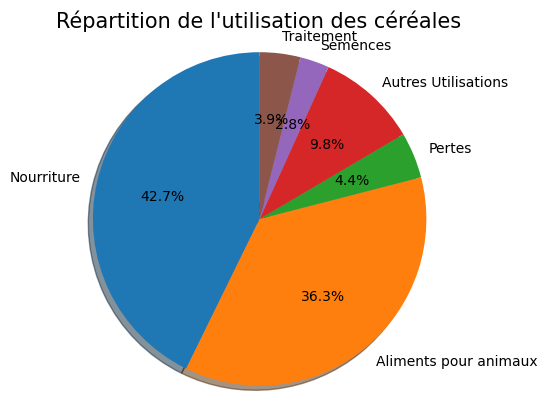

In [52]:
name = ['Nourriture', 'Aliments pour animaux', 'Pertes', 'Autres Utilisations','Semences','Traitement']
data = [dispo_cereales_nourriture, dispo_cereales_animale, dispo_cereales_pertes, dispo_cereales_Autres_utilisations, dispo_cereales_Semences,dispo_cereales_Traitement]

explode=(0, 0, 0, 0,0,0)
plt.pie(data,explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title("Répartition de l'utilisation des céréales",fontsize=15)
plt.show()

36.3 % de la disponibilté totale en céréales est utilisée pour l'alimentation animale contre 42.7 % utilisée pour l'alimentation humaine.

Une grande partie des céréales est réservée à la nourriture animale.

### 2.3.2 Situation de la Thaïlande <a class="anchor" id="##section_2_3_2"></a>

Intéressons nous de plus prêt à la Thaïlande.

In [53]:
proportion_sous_nut_thailande_2017 = proportion_sous_nut_2017[proportion_sous_nut_2017.Zone == 'Thaïlande']
proportion_sous_nut_thailande_2017

,Zone,Année,Population,Population en sous-nutrition,proportion en sous-nutrition %
185,Thaïlande,2017,69209810.0,6200000.0,8.96


8.96 % de la population de la Thaïlande est en sous-nutrition en 2017.

Nous allons nous centrer sur les chiffres qui concerne le manioc.

In [54]:
dispo_manioc = dispo[dispo.Produit == 'Manioc']
dispo_manioc_thailande = dispo_manioc[dispo_manioc.Zone == 'Thaïlande']
dispo_manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


In [55]:
dispo_manioc_thailande_export = dispo_manioc_thailande["Exportations - Quantité"] / dispo_manioc_thailande["Production"] * 100
dispo_manioc_thailande_export

13809    83.41273
dtype: float64

83.41 % de la production de manioc est exportée.

La Thaïlande exporte massivement sa production de manioc malgré que quasiment 1 personne sur 10 soit en sous-nutrition.

# Bilan de l'étude <a class="anchor" id="#bilan"></a>

L'étude nous montre que l'Afrique et l'Asie sont les continents les plus en difficulté alimentaire.

L'Europe et l'Amérique du Nord quant à eux sont les continents les plus épargnés.

La Sous-nutrition ne semble pas être un problème de disponibilité alimentaire mondiale mais plutôt un problème de répartition entre les pays et un problème d’utilisation (exportation massive, part réservée à l’animal)
